# Hochschule Bonn-Rhein-Sieg

# Neural Networks, WS17/18

# Assignment 07 (20-November-2017)

##  Debaraj Barua, Naresh Kumar Gurulingan

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import IPython
from sklearn import svm
from sklearn.metrics import accuracy_score

In [4]:
class SVM_classifier:

    def __init__(self, k= 'linear', deg= 3, c= 1., g= 'auto'):
        self.clf = svm.SVC(kernel= k, degree= deg, 
                           C= c, gamma= g)
    
    def plot_decision_boundry(self, data, labels, s_v= True):
        """
        This function plots the decision boundary, support vectors,
        and a contour showing distance of test points...
        """
        # source:
        # http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
        # http://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
        h = .02  # step size in the mesh
        x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
        y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
        Z = self.clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.coolwarm,
                edgecolors='k')
        plt.axis('tight')
        
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.8,
                   linestyles=['--', '-', '--'])
        if s_v == True:
            ax.scatter(self.clf.support_vectors_[:, 0], self.clf.support_vectors_[:, 1],
                   s=50, linewidth=0.5, facecolors='g', label= 'Support Vectors')
    
    
    def fit(self, points, labels):
        self.clf.fit(points, labels)
        
    def predict(self, points):
        return self.clf.predict(points)

---
## Question 1:

1) Read chapter 6 from Haykin’s book (2nd edition). Summarize or sketch your insights in mind-map or an outline or a summary.

---
## Question 2:

2) The graphs on the Figure1.pdf (see Instruction Files) represent three different one-dimensional classification (dichotomization) tasks (along a sketched x-axis, dash means “no data point”). 

What is the lowest-order polynomial decision function that can correctly classify the given data? Black dots denote class 1 with target function value y1 = +1 and white dots depict class 2 with targets y2 = -1. What are the decision boundaries? 

If you wanted to classify the data sets (a), (b), (c) using SVM’s with Gaussian basis functions, how many hidden layer neurons would you need for each problem? 

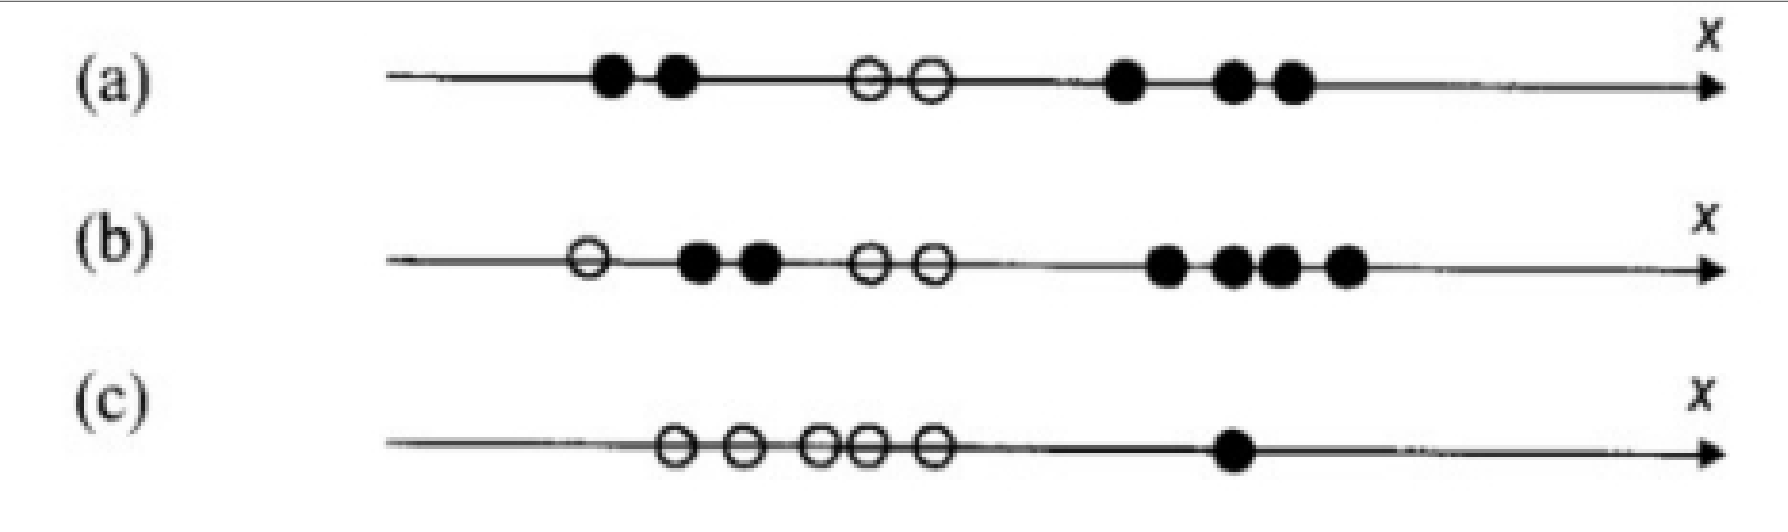

In [12]:
IPython.display.Image('images/Figure1.png', embed= True, width= 800 )

### a)

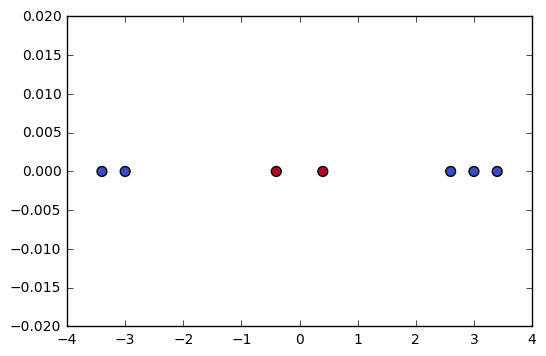

In [5]:
points = np.array([[-3.4, 0], [-3, 0], [-0.4, 0], [0.4, 0], 
                   [2.6, 0], [3, 0], [3.4, 0]])
labels = [0, 0, 1, 1, 0, 0, 0]
plt.scatter(points[:,0], points[:,1], c= labels, s= 50, 
            cmap= plt.cm.coolwarm)
plt.show()

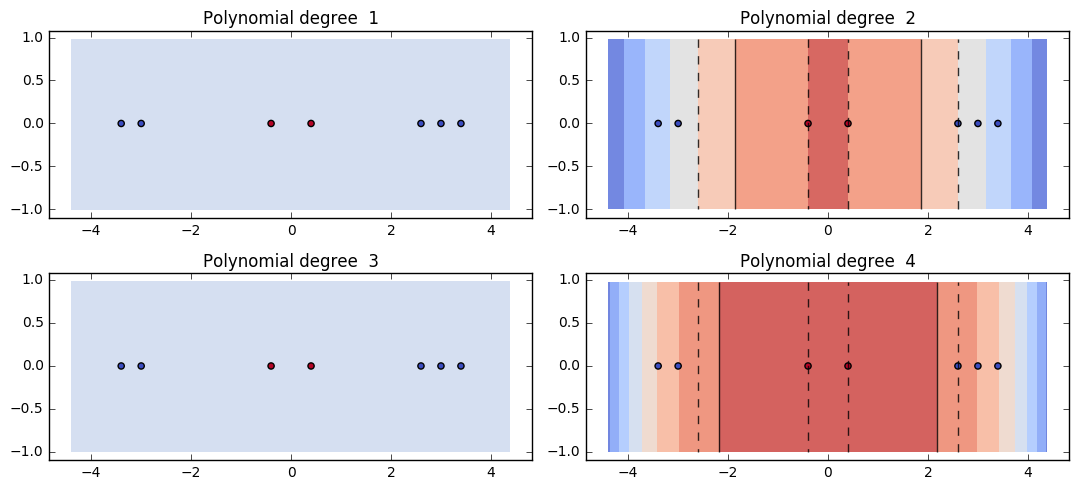

In [6]:
figure = plt.figure()
figure.set_figheight(5)
figure.set_figwidth(11)

for degree in range(1, 5):
    classifier = SVM_classifier(k= 'poly', deg= degree)
    classifier.fit(points, labels)
    figure.add_subplot(2, 2, degree)
    plt.title('Polynomial degree  '+str(degree))
    plt.tight_layout()
    classifier.plot_decision_boundry(points, labels, s_v= False)
plt.show()

### b)

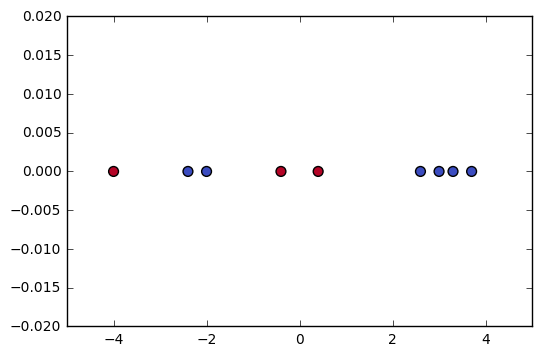

In [7]:
points = np.array([[-4, 0], [-2.4, 0], [-2, 0], [-0.4, 0], [0.4, 0], 
                   [2.6, 0], [3, 0], [3.3, 0], [3.7, 0]])
labels = [1, 0, 0, 1, 1, 0, 0, 0, 0]
plt.scatter(points[:,0], points[:,1], c= labels, s= 50, 
            cmap= plt.cm.coolwarm)
plt.show()

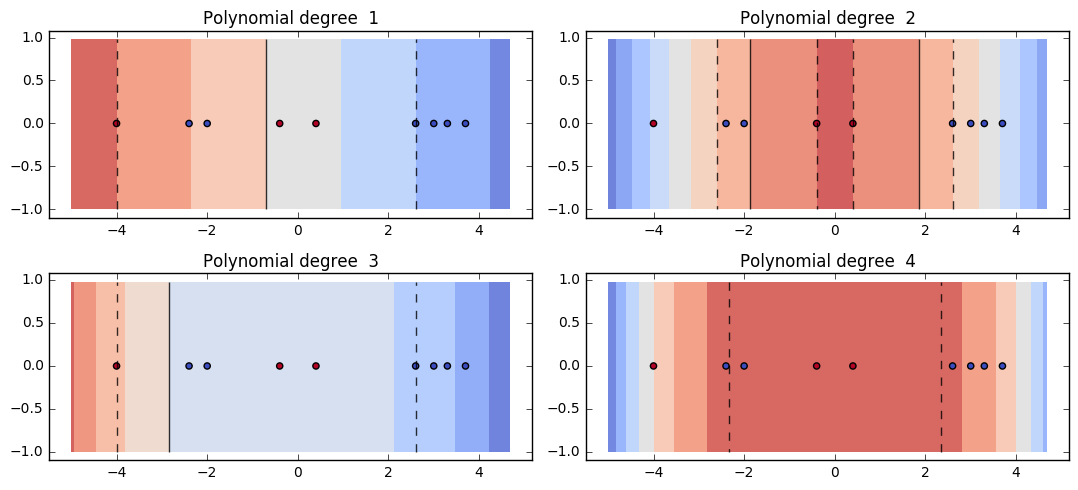

In [8]:
figure = plt.figure()
figure.set_figheight(5)
figure.set_figwidth(11)

for degree in range(1, 5):
    classifier = SVM_classifier(k= 'poly', deg= degree, g= 2)
    classifier.fit(points, labels)
    figure.add_subplot(2, 2, degree)
    plt.title('Polynomial degree  '+str(degree))
    plt.tight_layout()
    classifier.plot_decision_boundry(points, labels, s_v= False)
plt.show()

### c)

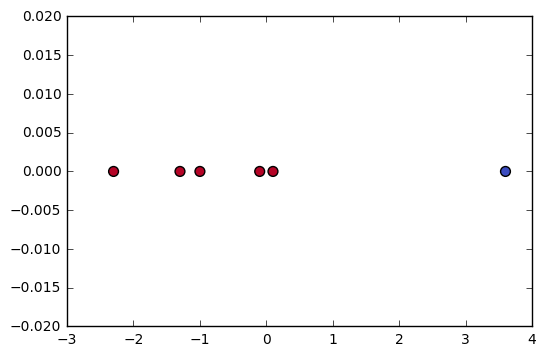

In [9]:
points = np.array([[-2.3, 0], [-1.3, 0], [-1, 0], [-0.1, 0], [0.1, 0], 
                   [3.6, 0]])
labels = [1, 1, 1, 1, 1, 0]
plt.scatter(points[:,0], points[:,1], c= labels, s= 50, 
            cmap= plt.cm.coolwarm)
plt.show()

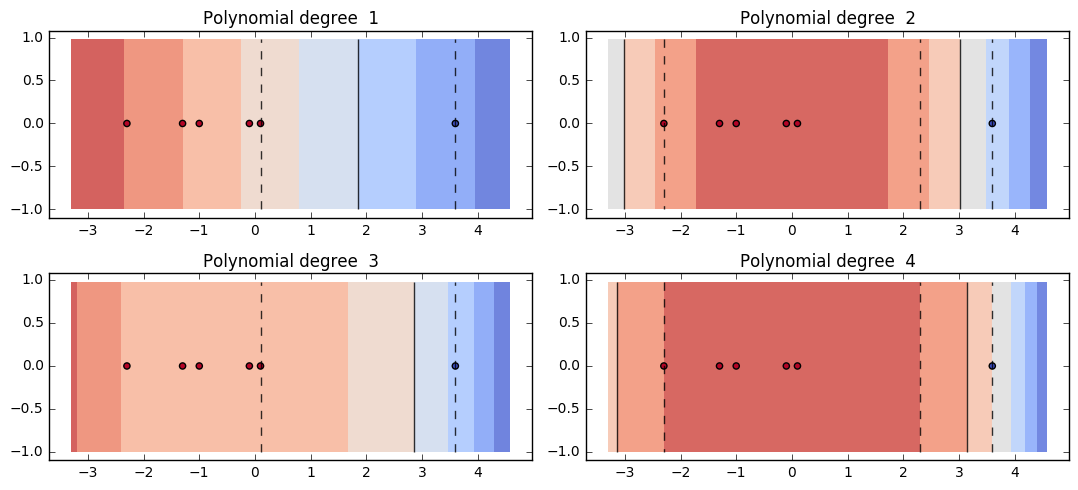

In [10]:
figure = plt.figure()
figure.set_figheight(5)
figure.set_figwidth(11)

for degree in range(1, 5):
    classifier = SVM_classifier(k= 'poly', deg= degree, g= 2)
    classifier.fit(points, labels)
    figure.add_subplot(2, 2, degree)
    plt.title('Polynomial degree  '+str(degree))
    plt.tight_layout()
    classifier.plot_decision_boundry(points, labels, s_v= False)
plt.show()

---
## Question 3:

3) For this exercise you can either use existing SVN-libraries (for example LIVSVM) or implement it youeself.

The image in the Figure2.pdf shows a pair of “moons” facing each other in an asymmetrically arranged manner. The moon labeled “Region A” is positioned symmetrically with respect to the y-axis, whereas the moon labeled “Region B” is displaced to the right of the y-axis by an amount equal to the radius r and below the x-axis by the distance d. The two moons have identical parameters: 

Radius of each moon, r = 10, 

Width of each moon, w = 6. 

The vertical distance d separating the two moons is adjustable; it is measured with respect to the x-axis, as indicated in the figure 

* Increasingly positive values of d signify increased separation between the two moons; 

* Increasingly negative values of d signify the two moons’ coming closer to each other. 

The training sample consists of 1000 pairs of data points, with each pair consisting of one point picked from region A and another point picked from region B, both randomly. The test sample consists of 3,000 pairs of data points, again picked in a random manner. 

Tasks: 

Your task is to classify the dataset using SVM (Support Vector Machine) for some cases given below. Generate the dataset for each case and classify using different kernels (e.g. linear, polynomial, radial basis etc.) Show the decision boundary (Plotting the classified points using different color will be enough) 

* Case 1: d = 0 

* Case 2: |d| = 1/2 * (radius of moon’s inner half-circle) and d is negative i.e. d is in the upper side of x-axis. 

* Case 3: Increase d negatively such that both of the moons touch each other. 

* Case 4: Both moons overlap each other 

* Case 5: Add some noise in the training set 

Try to experiment with different options in svmtrain (LIBSVM). Comment on your findings. 

This experiment is taken from Haykin’s book (3rd edition) which is introduced in the first chapter and continued throughout the book (chapter 2, 3, 4). For intuition, you can take a look in it.

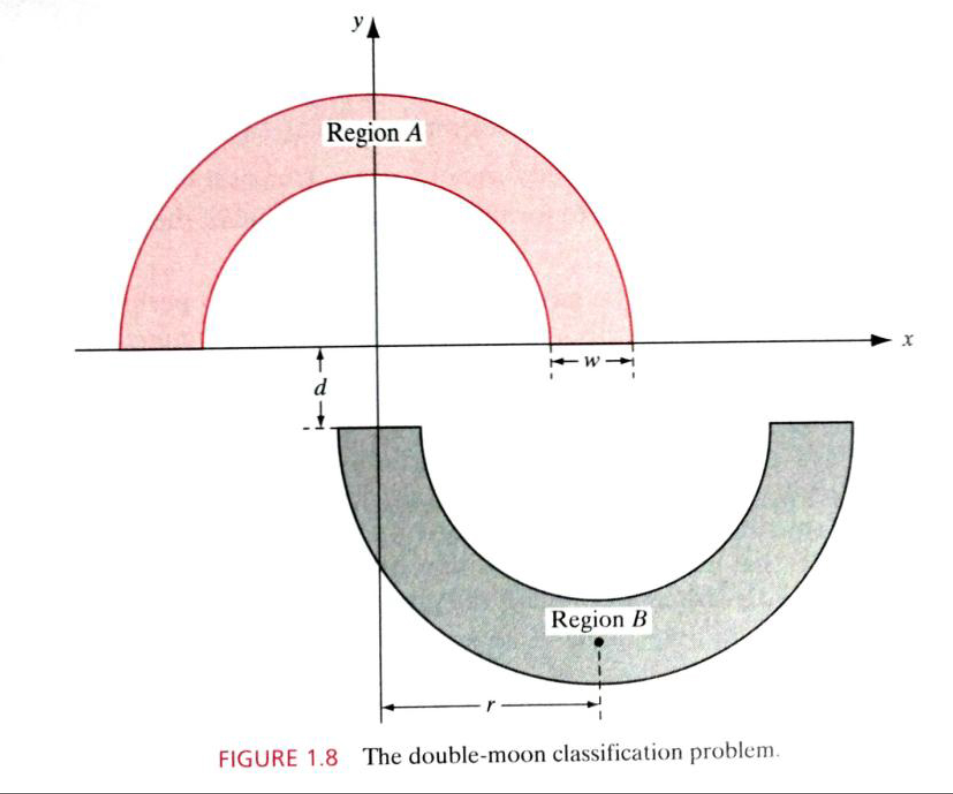

In [11]:
IPython.display.Image('images/Figure2.png', embed= True, width= 700 )

In [13]:
RADIUS = 10
WIDTH = 6

R_INNER = RADIUS - WIDTH/2
R_OUTER = RADIUS + WIDTH/2
THETA = np.linspace(0, 2*np.pi, 200)

def generate_points(d, size= None):
    """
        This function generates random points from
        the moons...
    """
    np.random.seed(0)
    r_red = np.random.uniform(R_INNER, R_OUTER, size= size)
    theta_red = np.random.uniform(0, 2*np.pi, size= size)
    r_black = np.random.uniform(R_INNER, R_OUTER, size= size)
    theta_black = np.random.uniform(0, 2*np.pi, size= size)
    
    x_r = r_red * np.cos(theta_red)
    y_r = np.abs(r_red * np.sin(theta_red))
    x_b = r_black * np.cos(theta_black)
    y_b = np.abs(r_black * np.sin(theta_black))
    
    red_moon = np.array([x_r, y_r]).T
    black_moon = np.array([x_b + RADIUS, -y_b - d]).T
    
    red_moon = np.insert(red_moon, 2, 1, axis= 1)
    black_moon = np.insert(black_moon, 2, 0, axis= 1)
    
    return np.vstack((red_moon, black_moon))

In [14]:
def check_points(d, train_data, test_data, title= None):
    """
        This function can be used to check
        whether the generated points are right...
    """
    x_red_inner = R_INNER * np.cos(THETA)
    y_red_inner = np.abs(R_INNER * np.sin(THETA))
    x_red_outer = R_OUTER * np.cos(THETA)
    y_red_outer = np.abs(R_OUTER * np.sin(THETA))

    x_black_inner = x_red_inner + RADIUS
    y_black_inner = -y_red_inner - d
    x_black_outer = x_red_outer + RADIUS
    y_black_outer = -y_red_outer - d
    
    fig = plt.figure(figsize=(8,3))
    
    fig.add_subplot(1, 2, 1)
    plt.title('Training points visualized')
    plt.plot([0, 0], [-15, 15], color= 'k', linewidth= 3)
    plt.plot([-15, 15], [0, 0], color= 'k', linewidth= 3)
    plt.plot(x_red_inner, y_red_inner, color= 'r', linewidth= 3)
    plt.plot(x_red_outer, y_red_outer, color= 'r', linewidth= 3)
    plt.plot(x_black_inner, y_black_inner, color= 'k', linewidth= 3)
    plt.plot(x_black_outer, y_black_outer, color= 'k', linewidth= 3)
    plt.scatter(train_data[:,0], train_data[:,1], c= train_data[:,2], 
                cmap=plt.cm.Paired)
    
    fig.add_subplot(1, 2, 2)
    plt.title('Test points visualized')
    plt.plot([0, 0], [-15, 15], color= 'k', linewidth= 3)
    plt.plot([-15, 15], [0, 0], color= 'k', linewidth= 3)
    plt.plot(x_red_inner, y_red_inner, color= 'r', linewidth= 3)
    plt.plot(x_red_outer, y_red_outer, color= 'r', linewidth= 3)
    plt.plot(x_black_inner, y_black_inner, color= 'k', linewidth= 3)
    plt.plot(x_black_outer, y_black_outer, color= 'k', linewidth= 3)
    plt.scatter(test_data[:,0], test_data[:,1], c= test_data[:,2], 
                cmap=plt.cm.Paired)
    plt.show()

In [15]:
def plot_results(kernel, C, gamma, tr_data, te_data):

    figure = plt.figure(1)
    figure.set_figheight(8)
    figure.set_figwidth(12)

    i = 1
    plot_points = []
    for c_v in C:
        for g_v in gamma:
            classifier = SVM_classifier(k= kernel, c= c_v, g= g_v)
            classifier.fit(tr_data[:,:-1], tr_data[:,-1:].reshape(-1))
            prediction = classifier.predict(te_data[:,:-1])
            accuracy = accuracy_score(prediction, te_data[:,-1:].reshape(-1) )
            plot_points.append([c_v, g_v, accuracy])
            figure.add_subplot(len(C_vals), len(gamma_vals), i)
            classifier.plot_decision_boundry(te_data[:,:-1], te_data[:,-1:])
            i += 1
    
    plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

    plot_points = np.array(plot_points)
    print np.vstack((np.array(['C','gamma','accuracy']), 
                     plot_points))

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(plot_points[:,0], plot_points[:,1], 
                plot_points[:,2], color='b')
    ax.set_xlabel('C')
    ax.set_ylabel('gamma')
    ax.set_zlabel('accuracy')
    ax.set_zlim(0, 1)
    plt.show()

### Case 1:  d = 0

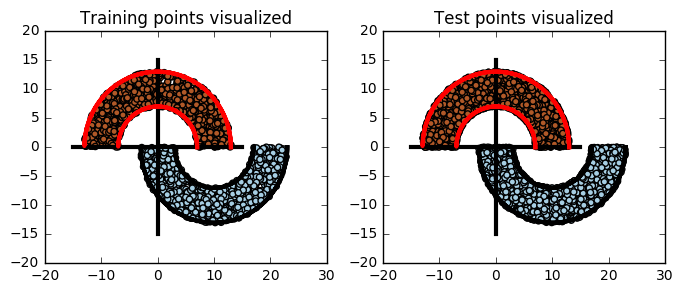

In [16]:
train_data = generate_points(0, size= 1000)
test_data = generate_points(0, size= 3000)
check_points(0, train_data, test_data)

### Linear kernel:

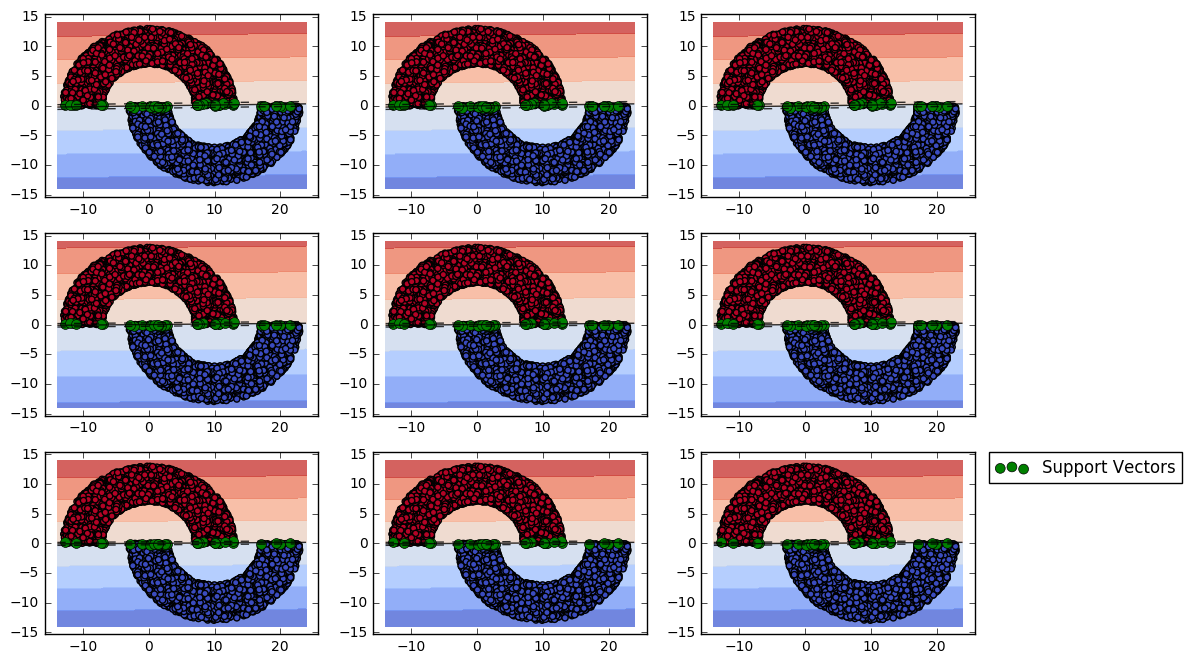

[['C' 'gamma' 'accuracy']
 ['0.3' '0.1' '0.997833333333']
 ['0.3' '0.3' '0.997833333333']
 ['0.3' '0.6' '0.997833333333']
 ['0.6' '0.1' '0.998666666667']
 ['0.6' '0.3' '0.998666666667']
 ['0.6' '0.6' '0.998666666667']
 ['1.0' '0.1' '0.999166666667']
 ['1.0' '0.3' '0.999166666667']
 ['1.0' '0.6' '0.999166666667']]


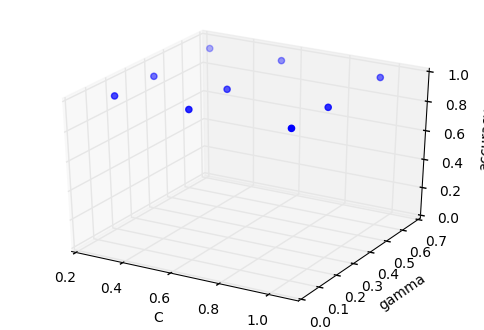

In [17]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('linear', C_vals, gamma_vals, train_data, test_data)

### Polynomial kernel:

In [ ]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('poly', C_vals, gamma_vals, train_data, test_data)

### Radial Basis Function kernel:

In [ ]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('rbf', C_vals, gamma_vals, train_data, test_data)

### Sigmoid kernel:

In [ ]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('sigmoid', C_vals, gamma_vals, train_data, test_data)

### Case 2:  |d| = 1/2 * (radius of moon’s inner half-circle) and d is negative i.e. d is in the upper side of x-axis.

In [ ]:
train_data_2 = generate_points(-0.5 * (R_INNER), size= 1000)
test_data_2 = generate_points(-0.5 * (R_INNER), size= 3000)
check_points(-0.5 * (R_INNER), train_data_2, test_data_2)

### Linear kernel:

In [ ]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('linear', C_vals, gamma_vals, train_data_2, test_data_2)

### Polynomial kernel:

In [ ]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('poly', C_vals, gamma_vals, train_data_2, test_data_2)

### Radial Basis Function kernel:

In [ ]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('rbf', C_vals, gamma_vals, train_data_2, test_data_2)

### Sigmoid kernel:

In [ ]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('sigmoid', C_vals, gamma_vals, train_data_2, test_data_2)

## Case 3: Increase d negatively such that both of the moons touch each other.

In [ ]:
train_data_3 = generate_points(-5.5, size= 1000)
test_data_3 = generate_points(-5.5, size= 3000)
check_points(-5.5, train_data_3, test_data_3)

### Linear Kernel:

In [ ]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('linear', C_vals, gamma_vals, train_data_3, test_data_3)

### Polynomial Kernel:

In [ ]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('poly', C_vals, gamma_vals, train_data_3, test_data_3)

### Radial Basis Function Kernel:

In [ ]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('rbf', C_vals, gamma_vals, train_data_3, test_data_3)

### Sigmoid Kernel:

In [ ]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('sigmoid', C_vals, gamma_vals, train_data_3, test_data_3)

##  Case 4: Both moons overlap each other

In [ ]:
train_data_4 = generate_points(-12, size= 1000)
test_data_4 = generate_points(-12, size= 3000)
check_points(-12, train_data_4, test_data_4)

### Linear Kernel:

In [ ]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('linear', C_vals, gamma_vals, train_data_4, test_data_4)

### Polynomial Kernel:

In [ ]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('poly', C_vals, gamma_vals, train_data_4, test_data_4)

### Radial Basis Function Kernel:

In [ ]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('rbf', C_vals, gamma_vals, train_data_4, test_data_4)

### Sigmoid Kernel:

In [ ]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('sigmoid', C_vals, gamma_vals, train_data_4, test_data_4)

##  Case 5: Add some noise in the training set

In [ ]:
train_data_5 = generate_points(0, size= 1000)
# adding noise...
train_data_5[:,0:2] = train_data_5[:,0:2] + np.random.normal(
    0, 2.5, size= train_data_5[:,0:2].shape)

test_data_5 = generate_points(0, size= 3000)
check_points(0, train_data_5, test_data_5)

### Linear Kernel:

In [ ]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('linear', C_vals, gamma_vals, train_data_5, test_data_5)

### Polynomial Kernel:

In [ ]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('poly', C_vals, gamma_vals, train_data_5, test_data_5)

### Radial Basis Function Kernel:

In [ ]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('rbf', C_vals, gamma_vals, train_data_5, test_data_5)

### Sigmoid Kernel:

In [ ]:
C_vals = [0.3, 0.6, 1.0]
gamma_vals = [0.1, 0.3, 0.6]
plot_results('sigmoid', C_vals, gamma_vals, train_data_5, test_data_5)